<a href="https://colab.research.google.com/github/nazar-ivantsiv/CS176C-Homework-4/blob/master/AI_Business_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Unit prediction economics

In [ ]:
def return_simple(value, accuracy, mistake_cost):
    return value - (1 - accuracy) * mistake_cost

In [ ]:
def accuracy_simple(value, mistake_cost):
    return 1 - value / mistake_cost

In [ ]:
def return_confidence(value, accuracy, mistake_cost, conf_split, manual_cost):
    return (value - (1 - accuracy) * mistake_cost) * conf_split - (1 - conf_split) * manual_cost

In [ ]:
def accuracy_confidence(value, mistake_cost, conf_split, manual_cost):
    return ((1 - conf_split) * manual_cost) / (conf_split * mistake_cost) - (value / mistake_cost) + 1

In [ ]:
VALUE = 5
ACCURACY = 0.8
MISTAKE_COST = 20

In [ ]:
ret_simple = return_simple(VALUE, 
              ACCURACY, 
              MISTAKE_COST)
acc_simple = accuracy_simple(VALUE,
              MISTAKE_COST)
print(ret_simple, acc_simple)

1.0000000000000009 0.75


In [ ]:
CONF_SPLIT = 0.5
MANUAL_COST = 5

In [ ]:
ret_confidence = return_confidence(VALUE, 
                  ACCURACY, 
                  MISTAKE_COST, 
                  CONF_SPLIT, 
                  MANUAL_COST)
acc_confidence = accuracy_confidence(
    VALUE, MISTAKE_COST, CONF_SPLIT, MANUAL_COST
)
print(ret_confidence, acc_confidence)

-1.9999999999999996 1.0


In [ ]:
CONF_SPLIT = 0.75
ret_confidence = return_confidence(VALUE, 
                  ACCURACY, 
                  MISTAKE_COST, 
                  CONF_SPLIT, 
                  MANUAL_COST)
acc_confidence = accuracy_confidence(
    VALUE, MISTAKE_COST, CONF_SPLIT, MANUAL_COST
)
print(ret_confidence, acc_confidence)

-0.49999999999999933 0.8333333333333333


In [ ]:
ACCURACY = 0.85
ret_confidence = return_confidence(VALUE, 
                  ACCURACY, 
                  MISTAKE_COST, 
                  CONF_SPLIT, 
                  MANUAL_COST)
acc_confidence = accuracy_confidence(
    VALUE, MISTAKE_COST, CONF_SPLIT, MANUAL_COST
)
print(ret_confidence, acc_confidence)

0.24999999999999956 0.8333333333333333


# Full scaling model

In [ ]:
# ---------- TO MANIPULATE: ML CONFIG ----------

ACCURACY = 0.85
MAX_ACCURACY = 0.99
CONF_SPLIT = 0.85

# ---------- TO MANIPULATE: PROJECT LOAD AND LENGTH ----------

DEV_MONTHS = 12
LIVE_MONTHS = 48
N_SAMPLES_MONTH = 10000

# ---------- BUSINESS CONSTRAINTS ----------

VALUE = 5 # minutes
MISTAKE_COST = 20 # minutes
MANUAL_COST = 5  # minutes
SAVED_MINUTE_PRICE_PER_ITEM = 50.0 / 60.0 # $50/h

# ---------- CONSTRAINTS ----------

AI_TEAM_MONTH_DEV = 10000
AI_TEAM_MONTH_LIVE = 2500
CLOUD_COMP_MONTH = 2000
CLOUD_INFRA_MONTH = 500

# ---------- COSTS CONSTRAINTS ----------

SUPPORT_PRICE_PER_ITEM = 0.1
DATA_COLLECTION_MONTH = N_SAMPLES_MONTH * 0.1 * SUPPORT_PRICE_PER_ITEM # let's say 10% of the load
MONITORING_MONTH = N_SAMPLES_MONTH * SUPPORT_PRICE_PER_ITEM # 100 % of the load
REGULATORY = 1000 # can be fix price here

In [ ]:
ACCURACY_CHANGE_DEV = np.zeros(DEV_MONTHS)
ACCURACY_CHANGE_LIVE = np.linspace(ACCURACY, MAX_ACCURACY, LIVE_MONTHS)

In [ ]:
RETURNS_DEV = np.zeros(DEV_MONTHS)
RETURNS_LIVE = return_confidence(VALUE, 
                  ACCURACY_CHANGE_LIVE, 
                  MISTAKE_COST, 
                  CONF_SPLIT, 
                  MANUAL_COST) * N_SAMPLES_MONTH * SAVED_MINUTE_PRICE_PER_ITEM

In [ ]:
COSTS_DEV = np.array([AI_TEAM_MONTH_DEV + CLOUD_COMP_MONTH + CLOUD_INFRA_MONTH + DATA_COLLECTION_MONTH] * DEV_MONTHS)
COSTS_LIVE = np.array([AI_TEAM_MONTH_LIVE + CLOUD_COMP_MONTH + CLOUD_INFRA_MONTH + DATA_COLLECTION_MONTH + MONITORING_MONTH + REGULATORY] * LIVE_MONTHS)

In [ ]:
ALL_RETURNS = np.append(RETURNS_DEV, RETURNS_LIVE)
ALL_COSTS = np.append(COSTS_DEV, COSTS_LIVE)
EQUITY = ALL_RETURNS - ALL_COSTS

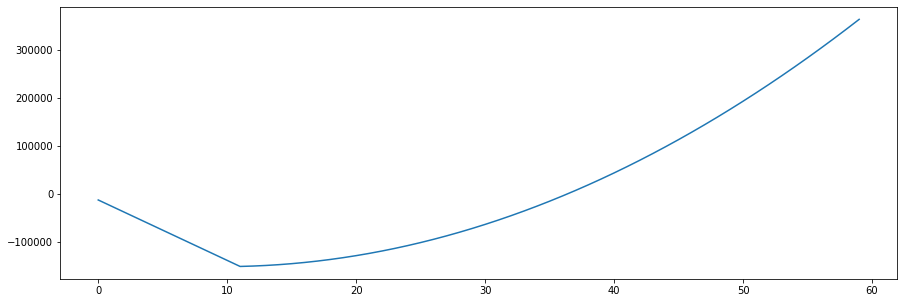

In [ ]:
plt.figure(figsize = (15, 5))
plt.plot(np.cumsum(EQUITY))
plt.show()